In [1]:
!pip install pandas
import pandas as pd
!pip install numpy
import numpy as np
!pip install statistics
import statistics
!pip install seaborn
import seaborn as sns

In [2]:
df = pd.read_excel('Решись!Задача4.xlsx')
df

,salary,exam,education
0,59634.52,93.42328,1
1,86653.05,100.00000,1
2,44618.66,54.54345,0
3,32816.56,48.42257,0
4,28589.03,41.49556,0
...,...,...,...
9995,30466.47,74.22810,0
9996,34741.11,36.40981,0
9997,111275.00,81.32597,1
9998,11666.88,37.15885,0


<Axes: xlabel='salary', ylabel='Count'>

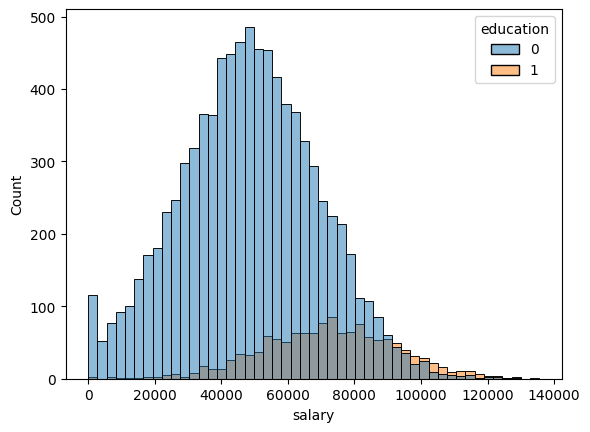

In [3]:
sns.histplot(data=df, x='salary', hue='education')

<Axes: xlabel='exam', ylabel='salary'>

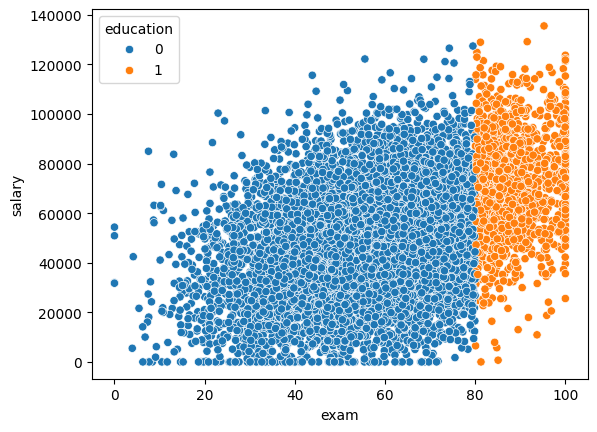

In [4]:
sns.scatterplot(
    x='exam', 
    y='salary', 
    data=df,
    hue='education')

Чистку начнем с удаления людей с нулевой зарплатой

In [5]:
df = df[df.salary > 0]

<Axes: xlabel='salary', ylabel='Count'>

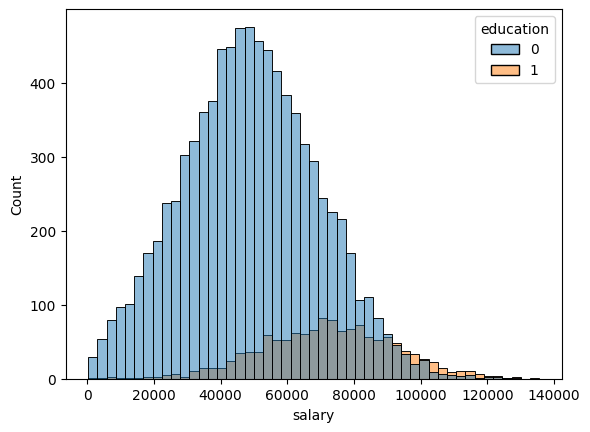

In [6]:
sns.histplot(data=df, x='salary', hue='education')

По гистограмме видно, что расределение является нормальным, а также мы видим, что присутствувет разница в зарплатах у людей с высшем образованием и без него.

In [7]:
df1 = df[df['education'] == 1]
df0 = df[df['education'] == 0]

In [9]:
dif_median = df1['salary'].median() - df0['salary'].median()
dif_mean = df1['salary'].mean() - df0['salary'].mean()
print("Разность медиан =", round(dif_median, 2))
print("Разность средних =", round(dif_mean, 2))

Разность медиан = 24235.57
Разность средних = 23688.35


Далее необходимо избавится от выбросов, для нахождения и определения которых воспользуемся boxplot.

<Axes: >

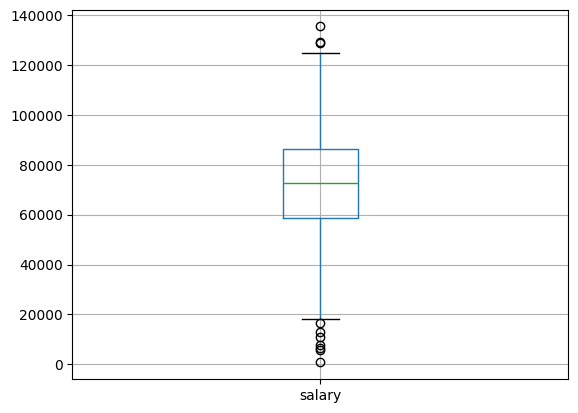

In [10]:
df1.boxplot(column=['salary'])

Выбросы есть, удалим их.

In [11]:
df1_new = df1
Q1 = df1_new["salary"].quantile(0.25)
Q3 = df1_new["salary"].quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)

In [12]:
df1_new = df1_new[(df1_new['salary'] > Lower_Fence) & (df1_new['salary'] < Upper_Fence)]

Перреходим к людям без высшего образования.

<Axes: >

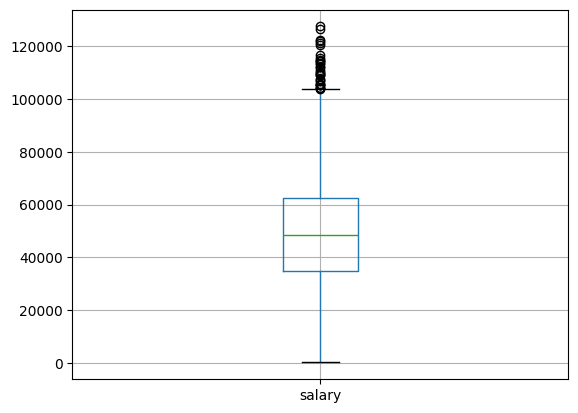

In [17]:
df0.boxplot(column=['salary'])

Выбросы есть, удалим их.

In [25]:
df0_new = df0
Q1 = df0_new["salary"].quantile(0.25)
Q3 = df0_new["salary"].quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)

In [26]:
df0_new = df0_new[(df0_new['salary'] > Lower_Fence) & (df0_new['salary'] < Upper_Fence)]

Посмотрим на данные после отчистки

In [27]:
df_new = df1_new.merge(df0_new, how = 'outer')

In [30]:
df_new

,salary,exam,education
0,59634.52,93.42328,1
1,86653.05,100.00000,1
2,68329.27,87.52866,1
3,70447.59,85.34913,1
4,78174.79,83.45242,1
...,...,...,...
9863,80976.17,64.08679,0
9864,30466.47,74.22810,0
9865,34741.11,36.40981,0
9866,11666.88,37.15885,0


<Axes: xlabel='exam', ylabel='salary'>

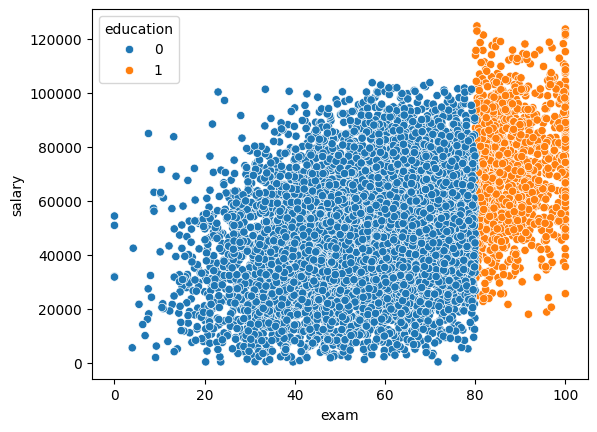

In [31]:
sns.scatterplot(
    x='exam', 
    y='salary', 
    data=df_new,
    hue='education')

Теперь на графике мы отчетливо видем разницу в зарплате между людьми с высшим образованием и без него

Чтобы оценить влияние наличия высшего образования необходимо взять выборки отличающиеся только наличием высшего образования, но у нас такое невозможно,
поэтому возьмем выборки с наиболее сходственными остальными показателями, то есть среди людей без высшего образования с наибольшими баллами за экзамен, 
а среди людей с высшим образованием - с наименьшими баллами за экзамен.

In [32]:
df0[df0['exam'] == max(df0['exam'])]

,salary,exam,education
8414,47879.16,79.99351,0


In [33]:
df1[df1['exam'] == min(df1['exam'])]

,salary,exam,education
5866,67528.21,80.01702,1


Но в  каждой выборке всего 1 человек, поэтому возьмем размах чуть больше.

In [34]:
ser0 = df0_new[(df0_new['exam'] >= max(df0_new['exam'])-1)]['salary']
ser0

14      75411.09
197     56591.36
374     57404.76
384     37638.41
489     36001.31
          ...   
9805    51175.49
9806    95387.92
9823    58412.29
9884    39672.08
9887    27009.60
Name: salary, Length: 137, dtype: float64

In [35]:
ser1 = df1_new[(df1_new['exam'] <= min(df1_new['exam'])+1)]['salary']
ser1

127      24853.78
240      70932.59
435      52015.21
447      45300.24
491      38791.40
          ...    
9431     36372.11
9522     96215.14
9650     35276.97
9909    100895.10
9939     70433.69
Name: salary, Length: 109, dtype: float64

In [36]:
dif = statistics.mean(ser1) - statistics.mean(ser0)
round(dif, 0)

17907.0

Эта выборка составила ≈250 человек, что составило ≈2,5% от общей выборки. А оценка влияние высшего образования на зарплату составило ≈ 17 900 рублей

Увеличим выборку подобно пункту 5 части 2

In [39]:
ser0 = df0_new[(df0_new['exam'] >= 75)]['salary']
ser1 = df1_new[(df1_new['exam'] <= 85)]['salary']
print("Количество людей из выборки без высшего образования =", len(ser0))
print("Количество людей из выборки с высшим образованием =", len(ser1))
dif = statistics.mean(ser1) - statistics.mean(ser0)
print("Оценка влияние высшего образования на зарплату =", dif)

Количество людей из выборки без высшего образования = 676
Количество людей из выборки с высшим образованием = 508
Оценка влияние высшего образования на зарплату = 15367.60702949261


Эта выборка составила ≈1200 человек, что составило ≈12% от общей выборки. А оценка влияние высшего образования на зарплату составило ≈ 15 000 рублей

В первой выборке(в которой 250 человек) влияние балла за экзамен минимально, но с другой стороны немного людей, а во второй выборке(в которой 1200 человек) людей много, но присутствует влияние балла за экзамен. Поэтому можно сказать, что влияние наличия высшего образования около 15 - 17 тысяч рублей. (Сноска 1.а)

Мы видим что разница уменьшилась, это произошло из-за того, что увеличилась разница между баллами за экзамен, который в свою очередь влияет на зарплату. (См. пункт 5)

Пункт 1

In [45]:
dif_mean = df1['salary'].mean() - df0['salary'].mean()
print("Разность средних зарплат у людей с высшим образованием и без него =", round(dif_mean, 0))

Разность средних зарплат у людей с высшим образованием и без него = 23688.0


In [46]:
dif_mean = df1['exam'].mean() - df0['exam'].mean()
print("Разность средних баллов за экзамен у людей с высшим образованием и без него =", round(dif_mean, 0))

Разность средних баллов за экзамен у людей с высшим образованием и без него = 33.0


exam_1 - exam_0 = dif_mean

Определим разницу средних talent, она равна = talent_1 - talent_0 = (exam_1-30)/70 - (*exam_0-30)/70 = (exam_1 - exam_0)/70 = 33/70 ≈ 0.43 = dif_talent

Тогда зарплат за счет talent = 20000*(dif_talent) = 20000*0.43 = 8600

Таким образов только разница баллов за экзамен приносит нам 8600 рублей разницы

Если мы вычтем их из полученной выше разности средних зарплат у людей с высшим образованием и без него получем 23688 - 8600 ≈ 15100 рублей.
Это число совпадает с числом полученным выше (См. сноска 1.а)